## Importing Libraries

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

## 1) Load the GPS data into a pandas DataFrame `birds_df`.  

In [2]:
birds_df = gpd.read_file("/home/lippi/100daysofMLcode/10_Coordinate_Refrence_System/Exercise/purple_martin.csv")
birds_df.head()

,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.14601429999999,17.5130487,30448,None
1,2014-09-01 05:59:00,-85.24350059999999,13.0957817,30448,None
2,2014-10-30 23:58:00,-62.9060891,-7.852436099999999,30448,None
3,2014-11-15 04:59:00,-61.77682579999999,-11.7238981,30448,None
4,2014-11-30 09:59:00,-61.241538299999995,-11.612236900000001,30448,None


## 2) Create a GeoDataFrame `birds`.  
- `birds` should have all of the columns from `birds_df`, along with a "geometry" column that contains Point objects with (longitude, latitude) locations.  
- Set the CRS of `birds` to `{'init': 'epsg:4326'}`.

In [3]:
birds = gpd.GeoDataFrame(birds_df,geometry=gpd.points_from_xy(birds_df["location-long"],birds_df["location-lat"]))
birds.crs = {'init': 'epsg:4326'}
birds.head()

/home/lippi/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,timestamp,location-long,location-lat,tag-local-identifier,geometry
0,2014-08-15 05:56:00,-88.14601429999999,17.5130487,30448,POINT (-88.14601 17.51305)
1,2014-09-01 05:59:00,-85.24350059999999,13.0957817,30448,POINT (-85.24350 13.09578)
2,2014-10-30 23:58:00,-62.9060891,-7.852436099999999,30448,POINT (-62.90609 -7.85244)
3,2014-11-15 04:59:00,-61.77682579999999,-11.7238981,30448,POINT (-61.77683 -11.72390)
4,2014-11-30 09:59:00,-61.241538299999995,-11.612236900000001,30448,POINT (-61.24154 -11.61224)


## 3) Load in the `'naturalearth_lowres'` dataset from GeoPandas, and set `americas` to a GeoDataFrame containing the boundaries of all countries in the Americas (both North and South America).

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


## 4) Plot the data:
- the country boundaries in the `americas` GeoDataFrame
- all of the points in the `birds_gdf` GeoDataFrame.  

<AxesSubplot:>

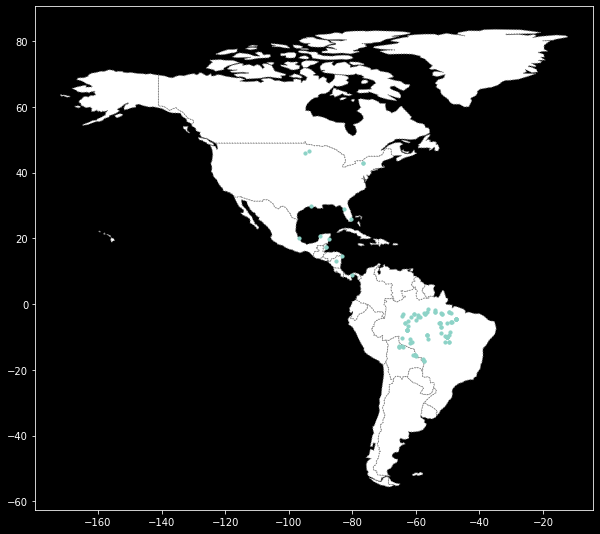

In [5]:
ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
birds.plot(ax=ax, markersize=10)

## 5) Where does each bird start and end its journey? (Part 1) Create 2 dataframes
- `path_gdf` contains LineString objects that show the path of each bird.  It uses the `LineString()` method to create a LineString object from a list of Point objects.
- `start_gdf` contains the starting points for each bird.

In [6]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

/home/lippi/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/lippi/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99208)
4,30275,POINT (-76.78213 42.99207)


## create a GeoDataFrame `end_gdf` containing the final location of each bird.  
- The format should be identical to that of `start_gdf`, with two columns ("tag-local-identifier" and "geometry"), where the "geometry" column contains Point objects.
- Set the CRS of `end_gdf` to `{'init': 'epsg:4326'}`.

In [7]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

/home/lippi/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## 6) Where does each bird start and end its journey? (Part 2)

Use the GeoDataFrames from the question above (`path_gdf`, `start_gdf`, and `end_gdf`) to visualize the paths of all birds on a single map.  You may also want to use the `americas` GeoDataFrame.

<AxesSubplot:>

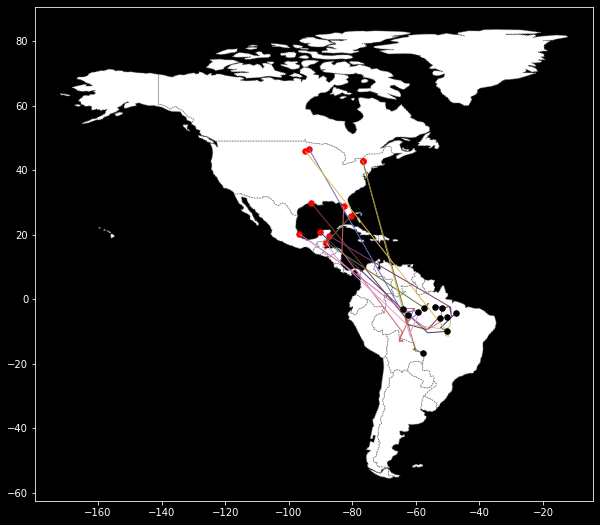

In [8]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=1)
end_gdf.plot(ax=ax, color='black', markersize=30)

## 7) Where are the protected areas in South America? (Part 1)

It looks like all of the birds end up somewhere in South America.  But are they going to protected areas?

Create a GeoDataFrame `protected_areas` containing the locations of all of the protected areas in South America.  The corresponding shapefile is located at filepath `protected_filepath`.

In [9]:
protected_areas = gpd.read_file("/home/lippi/100daysofMLcode/10_Coordinate_Refrence_System/Exercise/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")
protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


## 8) Where are the protected areas in South America? (Part 2)

Create a plot that uses the `protected_areas` GeoDataFrame to show the locations of the protected areas in South America.  (_You'll notice that some protected areas are on land, while others are in marine waters._)

<AxesSubplot:>

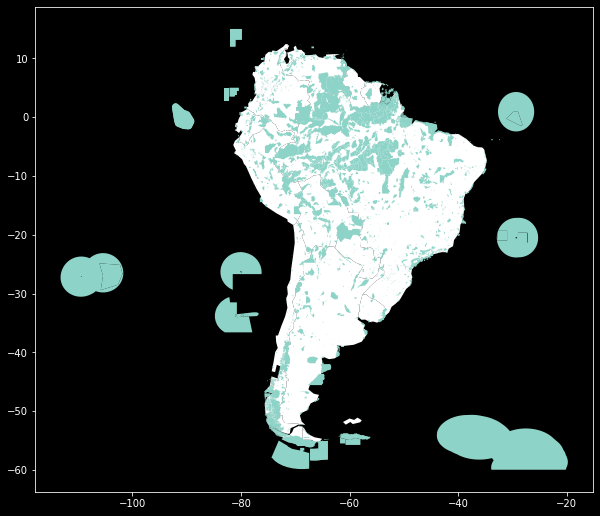

In [10]:
south_america = americas.loc[americas['continent']=='South America']
ax = south_america.plot(figsize=(10,10),color="white")
protected_areas.plot(ax =ax,linestyle=":")

## 9) What percentage of South America is protected?

You're interested in determining what percentage of South America is protected, so that you know how much of South America is suitable for the birds.  

As a first step, you calculate the total area of all protected lands in South America (not including marine area).  To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.

In [11]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


## Calculate the total area of South America by following these steps:
- Calculate the area of each country using the `area` attribute of each polygon (with EPSG 3035 as the CRS), and add up the results.  The calculated area will be in units of square meters.
- Convert your answer to have units of square kilometeters.

In [12]:
totalArea = sum(south_america.geometry.to_crs(epsg=3035).area) / 10**6

## What percentage of South America is protected?

In [13]:
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

Approximately 30.39% of South America is protected.


## 10) Where are the birds in South America?

So, are the birds in protected areas?  

Create a plot that shows for all birds, all of the locations where they were discovered in South America.  Also plot the locations of all protected areas in South America.

To exclude protected areas that are purely marine areas (with no land component), you can use the "MARINE" column (and plot only the rows in `protected_areas[protected_areas['MARINE']!='2']`, instead of every row in the `protected_areas` GeoDataFrame).

<AxesSubplot:>

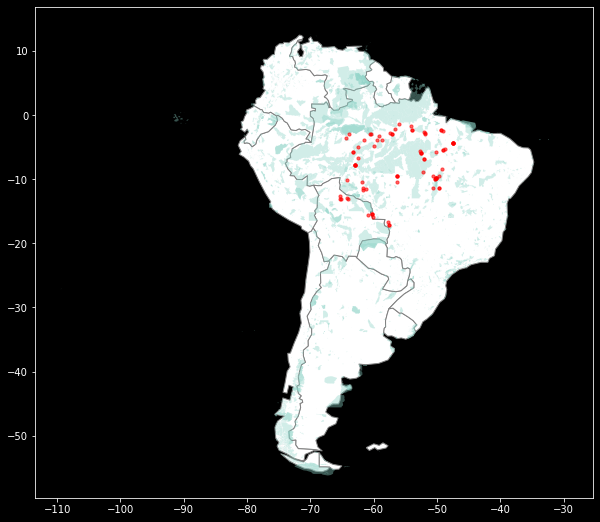

In [14]:
ax = south_america.plot(figsize=(10,10), color='white', edgecolor='gray')
protected_areas[protected_areas['MARINE']!='2'].plot(ax=ax, alpha=0.4, zorder=1)
birds[birds.geometry.y < 0].plot(ax=ax, color='red', alpha=0.6, markersize=10, zorder=2)